In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
psscan = pd.read_csv("psscan.csv")
pslist = pd.read_csv("pslist.csv")

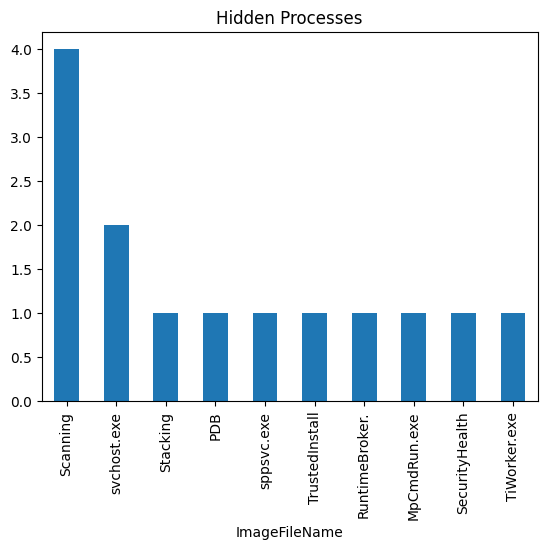

In [3]:
a = set(psscan["PID"].astype(str))
b = set(pslist["PID"].astype(str))
hidden = psscan[psscan["PID"].astype(str).isin(a - b)]
hidden["ImageFileName"].value_counts().head(10).plot(kind="bar")
plt.title("Hidden Processes")
plt.savefig("hidden_processes.png")
plt.show()

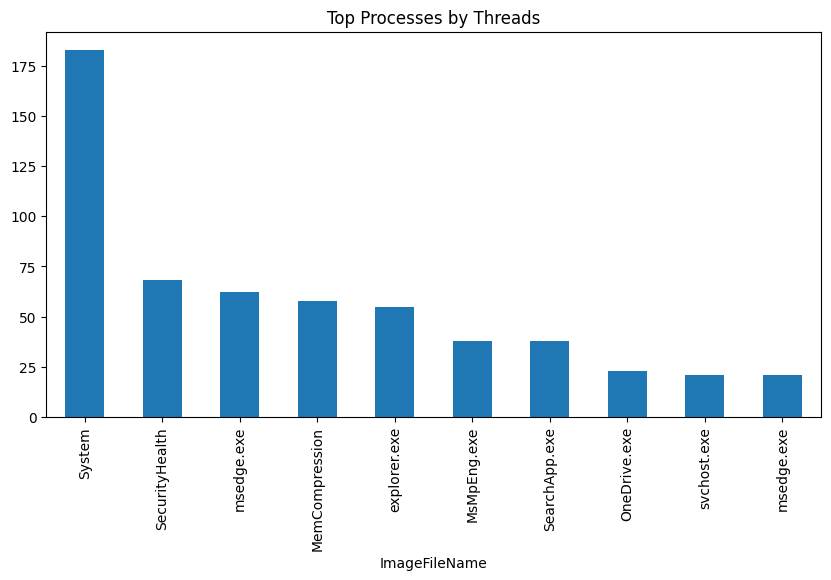

In [4]:
df = pd.read_csv("pslist.csv")
df = df[df["Threads"].str.isdigit()]
df["Threads"] = df["Threads"].astype(int)

top = df.sort_values("Threads", ascending=False).head(10)
top = top.set_index("ImageFileName")["Threads"]

plt.figure(figsize=(10,5))
top.plot(kind="bar")
plt.title("Top Processes by Threads")
plt.savefig("pslist_top_threads.png")
plt.show()

In [6]:
df = pd.read_csv("pslist.csv")

df = df[df["PID"].str.isdigit() & df["PPID"].str.isdigit()]

all_pids = set(df["PID"])

rows = []
for _, row in df.iterrows():
    if row["PPID"] not in all_pids:
        rows.append(row)

missing_parent = pd.DataFrame(rows)

top = missing_parent["ImageFileName"].value_counts().head(10)

plt.figure(figsize=(10,5))
top.plot(kind="bar")
plt.title("Processes With No Parent")
plt.savefig("ppid_missing.png")
plt.show()

AttributeError: Can only use .str accessor with string values!

In [7]:
df = pd.read_csv("pslist.csv")

df = df[df["PID"].str.isdigit() & df["PPID"].str.isdigit()]
pids = set(df["PID"])
ppid_missing = df[~df["PPID"].isin(pids)]

top = ppid_missing["ImageFileName"].value_counts().head(10)

plt.figure(figsize=(10,5))
top.plot(kind="bar")
plt.title("Processes with Missing Parent (PPID Anomalies)")
plt.savefig("ppid_anomalies.png")
plt.show()


AttributeError: Can only use .str accessor with string values!

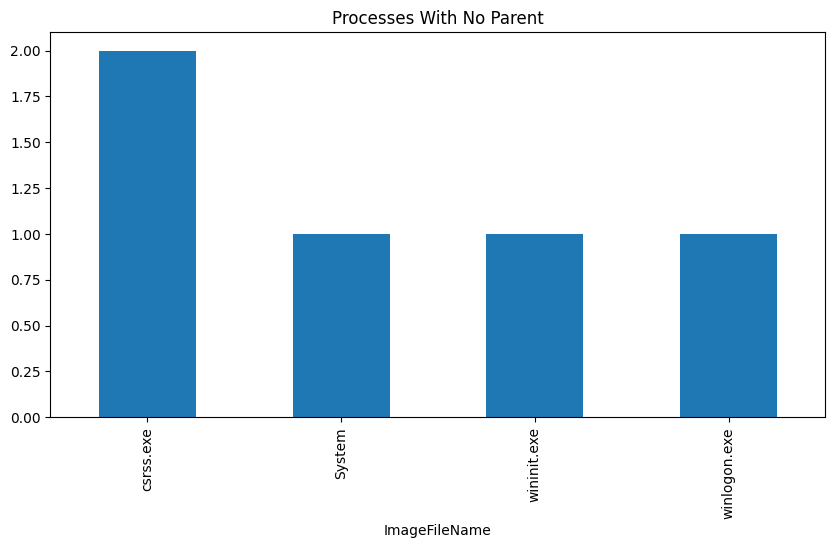

In [8]:
df = pd.read_csv("pslist.csv")

df["PID"] = df["PID"].astype(str)
df["PPID"] = df["PPID"].astype(str)

df = df[df["PID"].str.isdigit() & df["PPID"].str.isdigit()]

all_pids = set(df["PID"])

rows = []
for _, row in df.iterrows():
    if row["PPID"] not in all_pids:
        rows.append(row)

missing_parent = pd.DataFrame(rows)

top = missing_parent["ImageFileName"].value_counts().head(10)

plt.figure(figsize=(10,5))
top.plot(kind="bar")
plt.title("Processes With No Parent")
plt.savefig("ppid_missing.png")
plt.show()


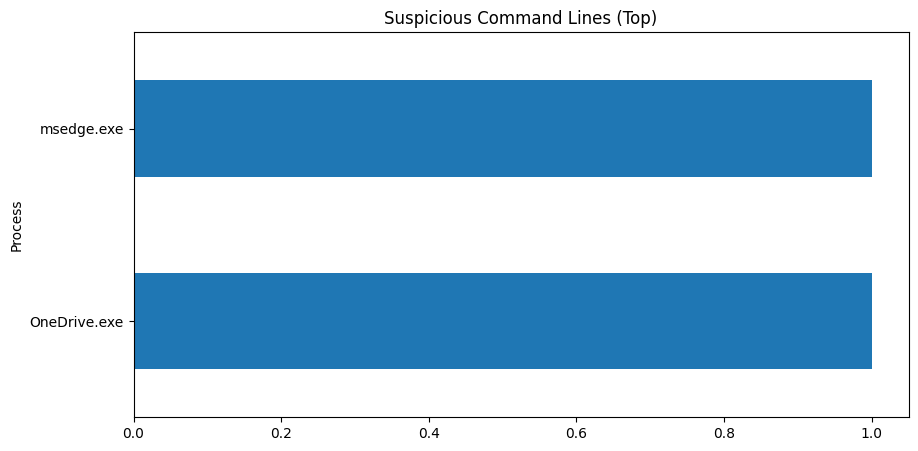

In [11]:
df = pd.read_csv("cmdline.csv")
df["Args"] = df["Args"].astype(str).str.lower()

sus = (
    df["Args"].str.contains("temp", na=False, regex=False) |
    df["Args"].str.contains("appdata", na=False, regex=False) |
    df["Args"].str.contains("\\users\\public", na=False, regex=False) |
    df["Args"].str.contains("\\downloads", na=False, regex=False) |
    df["Args"].str.contains("powershell", na=False, regex=False) |
    df["Args"].str.contains("rundll32", na=False, regex=False) |
    df["Args"].str.contains("wscript", na=False, regex=False) |
    df["Args"].str.contains("cscript", na=False, regex=False) |
    df["Args"].str.contains("cmd.exe", na=False, regex=False) |
    df["Args"].str.contains("cmd /c", na=False, regex=False)
)

hits = df[sus]
top = hits["Process"].value_counts().head(10).sort_values()

plt.figure(figsize=(10,5))
top.plot(kind="barh")
plt.title("Suspicious Command Lines (Top)")
plt.savefig("cmdline_suspicious_barh.png")
plt.show()

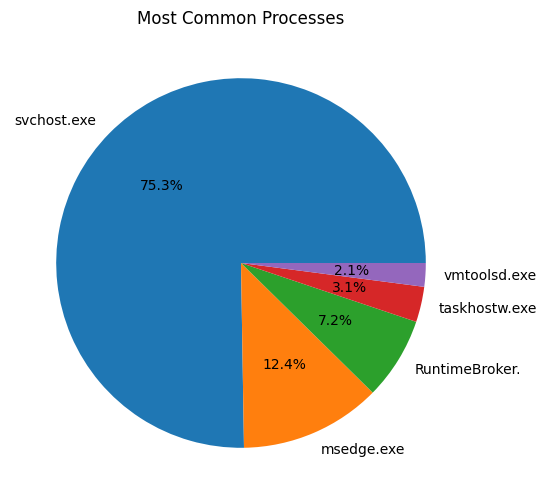

In [12]:
df = pd.read_csv("pslist.csv")

counts = df["ImageFileName"].value_counts().head(5)

plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct="%1.1f%%")
plt.title("Most Common Processes")
plt.savefig("process_pie.png")
plt.show()

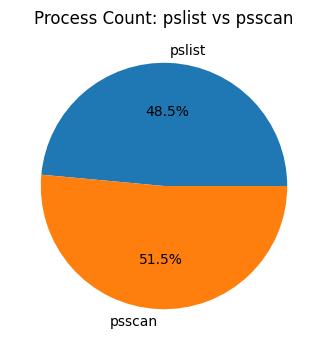

In [13]:
psl = pd.read_csv("pslist.csv")
psc = pd.read_csv("psscan.csv")

vals = pd.Series({"pslist": psl["PID"].nunique(), "psscan": psc["PID"].nunique()})

plt.figure(figsize=(6,4))
plt.pie(vals, labels=vals.index, autopct="%1.1f%%")
plt.title("Process Count: pslist vs psscan")
plt.savefig("count_pslist_psscan_pie.png")
plt.show()

In [14]:
df = pd.read_csv("malfind.csv")

df["Protection"] = df["Protection"].astype(str)

rwx_rows = []
for i in range(len(df)):
    if "PAGE_EXECUTE_READWRITE" in df["Protection"][i]:
        rwx_rows.append(df.iloc[i])

rwx_df = pd.DataFrame(rwx_rows)

top = rwx_df["Process"].value_counts().head(10)

plt.figure(figsize=(10,5))
top.plot(kind="bar")
plt.title("RWX Memory Regions (Top 10)")
plt.savefig("malfind_rwx_top.png")
plt.show()

KeyError: 'Process'

In [15]:
df = pd.read_csv("malfind.csv")
print(df.columns)

Index(['PID', 'Process', 'Start', 'VPN', 'End', 'VPN.1', 'Tag', 'Protection',
       'CommitCharge', 'PrivateMemory', 'File', 'output', 'Notes', 'Hexdump',
       'Disasm', 'Hexdump.1'],
      dtype='object')


In [16]:
df = pd.read_csv("malfind.csv")
df["Protection"] = df["Protection"].astype(str)

rwx_rows = []
for i in range(len(df)):
    if "PAGE_EXECUTE_READWRITE" in df["Protection"][i]:
        rwx_rows.append(df.iloc[i])

rwx_df = pd.DataFrame(rwx_rows)

if not rwx_df.empty:
    top = rwx_df["Process"].value_counts().head(10)

    plt.figure(figsize=(10,5))
    top.plot(kind="bar")
    plt.title("Processes with RWX Memory Regions (Top 10)")
    plt.savefig("malfind_rwx_top.png")
    plt.show()
else:
    print("No RWX (PAGE_EXECUTE_READWRITE) memory found in this data.")

No RWX (PAGE_EXECUTE_READWRITE) memory found in this data.


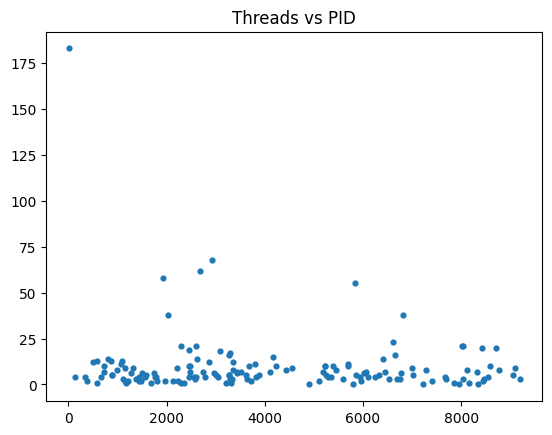

In [19]:
df = pd.read_csv("pslist.csv")

df = df[df["PID"].astype(str).str.isdigit() & df["Threads"].astype(str).str.isdigit()]

df["PID"] = df["PID"].astype(int)
df["Threads"] = df["Threads"].astype(int)

plt.scatter(df["PID"], df["Threads"], s=12)
plt.title("Threads vs PID")
plt.savefig("threads_vs_pid.png")
plt.show()


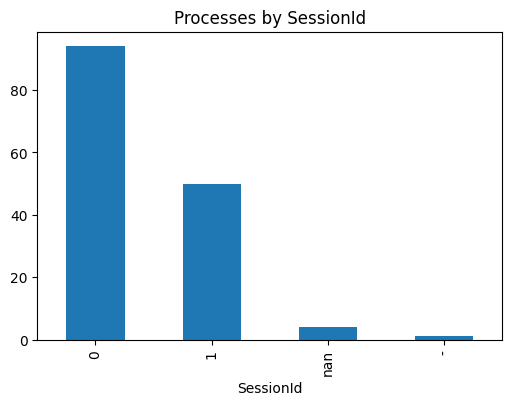

In [20]:
df = pd.read_csv("pslist.csv")
counts = df["SessionId"].astype(str).value_counts()

plt.figure(figsize=(6,4))
counts.plot(kind="bar")
plt.title("Processes by SessionId")
plt.savefig("session_counts.png")
plt.show()

In [1]:
df = pd.read_csv("malfind.csv")

print(df["Process"].value_counts().head(10))

suspicious = df[df["File"].isna() | (df["File"] == "-")]
print(suspicious.head())

NameError: name 'pd' is not defined

In [2]:
import pandas as pd

df = pd.read_csv("malfind.csv")


print(df["Process"].value_counts().head(10))

suspicious = df[df["File"].isna() | (df["File"] == "-")]
print(suspicious.head())

Process
MsMpEng.exe       13
48                10
00                 3
smartscreen.ex     2
57                 2
8d                 2
89                 1
4c                 1
83                 1
OneDrive.exe       1
Name: count, dtype: int64
     PID         Process          Start            VPN   End  \
0   8112  smartscreen.ex  0x1d36f680000  0x1d36f69ffff  VadS   
6   6620    OneDrive.exe  0x220b5f00000  0x220b5f0ffff  VadS   
10  2036     MsMpEng.exe  0x2902a200000  0x2902a30cfff  VadS   
13  2036     MsMpEng.exe  0x29034830000  0x2903493cfff  VadS   

                     VPN.1  Tag Protection CommitCharge PrivateMemory File  \
0   PAGE_EXECUTE_READWRITE    1          1     Disabled           NaN  NaN   
6   PAGE_EXECUTE_READWRITE   16          1     Disabled           NaN  NaN   
10  PAGE_EXECUTE_READWRITE  269          1     Disabled           NaN  NaN   
13  PAGE_EXECUTE_READWRITE  269          1     Disabled           NaN  NaN   

   output Notes Hexdump Disasm Hexdump.1  
0

In [7]:
import pandas as pd
n = pd.read_csv("netscan.csv", dtype=str).fillna("")
n["ForeignAddr"] = n["ForeignAddr"].str.strip()
agg = n[n["ForeignAddr"].str.len()>0].groupby("PID")["ForeignAddr"].nunique().sort_values(ascending=False).head(20)
agg.to_csv("netscan_pid_remote_count.csv")
print(agg.head(20))

PID
5704           4
1280           2
728            2
2468           2
2748           2
984            2
4              2
572            2
1320           2
6804           2
716            2
msedge.exe     1
dasHost.exe    1
System         1
8336           1
8032           1
5832           1
5848           1
3440           1
3292           1
Name: ForeignAddr, dtype: int64
